Load and Preview Spaceship Titanic Data

In [53]:
import pandas as pd

# Load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Preview the training data
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Basic Shape of Data 

In [54]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Check column types and nulls
train.info()


Train shape: (8693, 14)
Test shape: (4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Are there missing values in the data?

In [55]:
# Total missing values per column
train.isnull().sum().sort_values(ascending=False)


CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

What is the balance of transported versus non-transported individuals?

In [56]:
# Check distribution of the target variable
train["Transported"].value_counts(normalize=True)


Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64

Quick look at categorical features

In [57]:
# Look at unique values of a few key categorical features
for col in ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']:
    print(f"\n{col}:\n", train[col].value_counts(dropna=False))



HomePlanet:
 HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

CryoSleep:
 CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

Cabin:
 Cabin
NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: count, Length: 6561, dtype: int64

Destination:
 Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

VIP:
 VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64


Summary Stats for numeric features 

In [58]:
# Summary statistics
train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Plots of transported vs not transported individuals based on feature

Age bar plot (transported vs not transported)

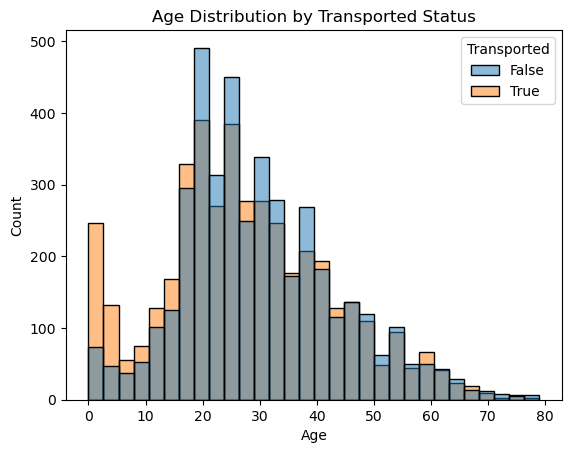

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution by Transported status
sns.histplot(data=train, x="Age", hue="Transported", bins=30)
plt.title("Age Distribution by Transported Status")
plt.show()


HomePlanet bar plot (transported vs not transported)

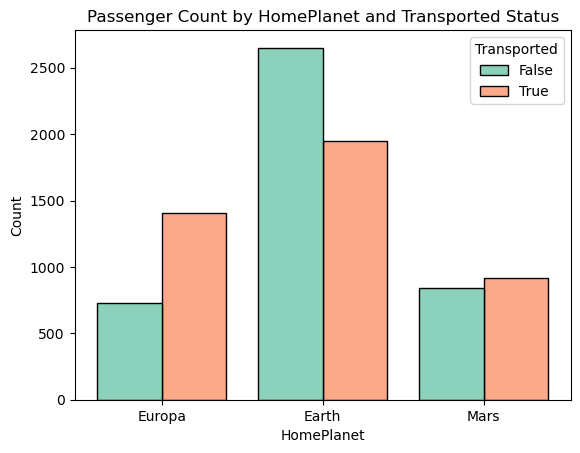

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(
    data=train,
    x="HomePlanet",
    hue="Transported",
    multiple="dodge",       # ← this is the key!
    shrink=0.8,             # optional: spacing between bars
    stat="count",           # just to be explicit
    palette="Set2"          # optional: adds nicer colors
)

plt.title("Passenger Count by HomePlanet and Transported Status")
plt.xlabel("HomePlanet")
plt.ylabel("Count")
plt.show()


CryoSleep barplot (transported vs not transported)

Text(0.5, 1.0, 'CryoSleep vs Transported')

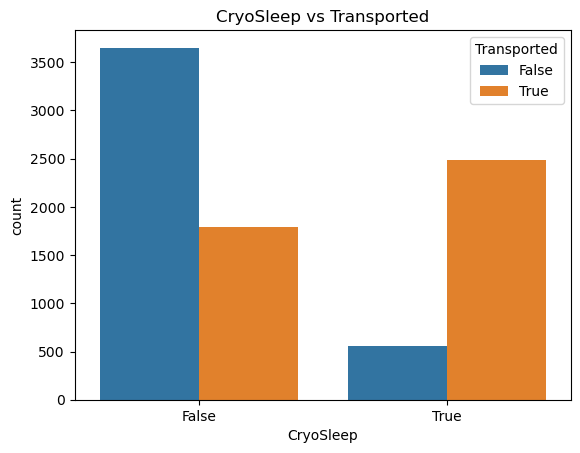

In [61]:
sns.countplot(data=train, x='CryoSleep', hue='Transported')
plt.title("CryoSleep vs Transported")


Data Cleaning & Feature Engineering 

In [62]:
pd.set_option('future.no_silent_downcasting', True)

# Copy original to avoid mutation
df = train.copy()

# Drop PassengerId (not predictive), but keep for later in test set
df.drop(columns=["PassengerId", "Name", "Cabin"], inplace=True)  # Cabin is complicated, skip for now

# Handle missing values
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    mode_val = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(mode_val).astype(df[col].dtype)


# Fill numeric vars with median
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Encode binary columns
df['CryoSleep'] = df['CryoSleep'].map({'True': 1, 'False': 0})
df['VIP'] = df['VIP'].map({'True': 1, 'False': 0})

# One-hot encode multi-class categoricals
df = pd.get_dummies(df, columns=['HomePlanet', 'Destination'], drop_first=True)

# Create new feature: TotalSpend
df["TotalSpend"] = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

# Encode target variable
df["Transported"] = df["Transported"].map({True: 1, False: 0})


Train/Test Split and Modeling 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare features and target
X = df.drop(columns=["Transported"])
y = df["Transported"]

# Fill any remaining NaNs just in case
X = X.fillna(0)

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.7763082231167338

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75       861
           1       0.73      0.88      0.80       878

    accuracy                           0.78      1739
   macro avg       0.79      0.78      0.77      1739
weighted avg       0.79      0.78      0.77      1739



Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_val)

print("Tree Accuracy:", accuracy_score(y_val, y_tree_pred))


Tree Accuracy: 0.7584818861414606


Decision Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Random Forest
forest_model = RandomForestClassifier(
    n_estimators=100, # number of trees
    max_depth=12, # try to avoid overfitting
    random_state=42, # ensure reporducibility
    n_jobs=-1         
)

forest_model.fit(X_train, y_train)
y_forest_pred = forest_model.predict(X_val)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_val, y_forest_pred))
print("\nClassification Report:\n", classification_report(y_val, y_forest_pred))


Random Forest Accuracy: 0.7768832662449684

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.77       861
           1       0.76      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



Submission csv

In [66]:
# Load the test set
test = pd.read_csv("test.csv")
submission = test.copy()

# === Preprocess test data just like train ===

# Drop columns not used
submission.drop(columns=["Name", "Cabin"], inplace=True)

# Fill missing categorical values
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    submission[col] = submission[col].fillna(submission[col].mode(dropna=True)[0])

# Fill missing numeric values
for col in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    submission[col] = submission[col].fillna(submission[col].median())

# Binary encodings
submission['CryoSleep'] = submission['CryoSleep'].map({'True': 1, 'False': 0})
submission['VIP'] = submission['VIP'].map({'True': 1, 'False': 0})

# One-hot encoding
submission = pd.get_dummies(submission, columns=['HomePlanet', 'Destination'], drop_first=True)

# Add TotalSpend
submission["TotalSpend"] = submission[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

# Save PassengerId and remove it from features
passenger_ids = submission["PassengerId"]
submission = submission.drop(columns=["PassengerId"])

# Align test data with training columns (in case any mismatch)
submission = submission.reindex(columns=X_train.columns, fill_value=0)

# === Make predictions
preds = forest_model.predict(submission)

# === Convert to expected output format
output = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": preds.astype(bool)  # back to True/False for Kaggle
})

# === Save to CSV
output.to_csv("submission.csv", index=False)


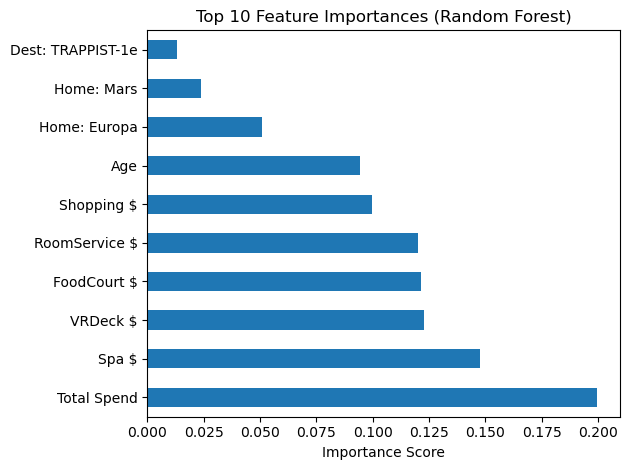

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Define label mapping
pretty_names = {
    "Destination_TRAPPIST-1e": "Dest: TRAPPIST-1e",
    "HomePlanet_Mars": "Home: Mars",
    "HomePlanet_Europa": "Home: Europa",
    "Age": "Age",
    "ShoppingMall": "Shopping $",
    "RoomService": "RoomService $",
    "FoodCourt": "FoodCourt $",
    "VRDeck": "VRDeck $",
    "Spa": "Spa $",
    "TotalSpend": "Total Spend"
}

# Get top 10 features
importances = pd.Series(forest_model.feature_importances_, index=X_train.columns)
top_features = importances.nlargest(10)

# Apply pretty names
top_features.index = [pretty_names.get(col, col) for col in top_features.index]

# Plot
top_features.plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

